In [ ]:
#firstly import the drive where is our data.
from google.colab import drive
drive.mount('/content/gdrive')   #a name to drive 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#display the contents of our drive and checks if the drive is mounted properly
import os
print(os.listdir('/content/gdrive/My Drive/'))

In [ ]:
!unzip '/content/gdrive/My Drive/CV-20200627T143437Z-001.zip' -d'/content/gdrive/My Drive/'

In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from google.colab import files 
from keras.preprocessing import image 
import random 
import os 
import shutil

In [ ]:
#function for creating  folders 
def make_dir(path):

  try:
    os.makedirs(path)
    print('file created')
  except FileExistsError:
    print('the file already exists')


In [ ]:
#function to delete the folders
def remove_dir(path):
  try:
    shutil.rmtree(path)
    print('Folder deleted at {}'.format(path))
  except:
    print('file does not exists')

In [ ]:
main_dir = '/content/gdrive/My Drive/CV/train_set/'
categories = ['drawings','painting','engraving','iconography','sculpture']

#path is splitted as above  making the work easy 

def create_folders():
  for cat in categories:
    make_dir(str(main_dir+'train/'+'train_'+ cat ))
    make_dir(str(main_dir+ 'test/'+'test_'+ cat))

def delete_folders():
  for cat in categories:
    remove_dir(str(main_dir+'train/'+'train_'+ cat ))
    remove_dir(str(main_dir+ 'test/'+'test_'+ cat))




# Splitting Data into Train and Test sets

*split_data* function takes pictures from their respective categories and randomly splits them into test and train folders for their respective category.
The split is made according to the *split_size*.
For example if *split_size*=0.8, 80% of the data goes to train set and 20% to the test set.

---

P.S:
here earlier split_data was called more than once 
now after some changes it can be called only once 

In [ ]:
def split_data(split_size):
  
    
  delete_folders()
  create_folders()

  
  for cat in categories:
    source=str(main_dir+cat+'/')  #specifying source path
    train_dir=str(main_dir+'/train/train_'+cat+'/') 
    test_dir=str(main_dir+'/test/test_'+cat+'/')

#shuffling the data and splitting it into train and test folders 
    shuffled_source = random.sample(os.listdir(source),len(os.listdir(source)))
    train_list = shuffled_source[: int(split_size*len(os.listdir(source)))]
    test_list = shuffled_source[int(split_size*len(os.listdir(source))) :]
      
    for files in train_list:
      shutil.copyfile(os.path.join(source,files),os.path.join(train_dir,files))

    for files in test_list:
        shutil.copyfile(os.path.join(source,files),os.path.join(test_dir,files))

In [ ]:
split_data(0.79)

Folder deleted at /content/gdrive/My Drive/CV/train_set/train/train_drawings
Folder deleted at /content/gdrive/My Drive/CV/train_set/test/test_drawings
Folder deleted at /content/gdrive/My Drive/CV/train_set/train/train_painting
Folder deleted at /content/gdrive/My Drive/CV/train_set/test/test_painting
Folder deleted at /content/gdrive/My Drive/CV/train_set/train/train_engraving
Folder deleted at /content/gdrive/My Drive/CV/train_set/test/test_engraving
Folder deleted at /content/gdrive/My Drive/CV/train_set/train/train_iconography
Folder deleted at /content/gdrive/My Drive/CV/train_set/test/test_iconography
Folder deleted at /content/gdrive/My Drive/CV/train_set/train/train_sculpture
Folder deleted at /content/gdrive/My Drive/CV/train_set/test/test_sculpture
file created
file created
file created
file created
file created
file created
file created
file created
file created
file created


In [ ]:
model = tf.keras.models.Sequential(
    [
                        #note the input shape is the desired size of the image 300x300 with 3 bytes color
                        # This is the first convolution 
                        tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (300,300,3)),
                        tf.keras.layers.MaxPooling2D(2,2),
                        #this is second convolution 
                        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                        tf.keras.layers. MaxPooling2D(2,2),
                        #this is third convolution 
                        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        #this is fourth convolution
                        tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        #flatten the results to feed onto DNN
                        tf.keras.layers.Flatten(),
                        #512 neuron hidden layer
                        tf.keras.layers.Dense(512,activation = 'relu'),
                        #64 neuron hidde layer
                        #adding this gave better performance 
                        tf.keras.layers.Dense(64,activation = 'relu'),
                        # 5 here is output and softmax better result 
                        tf.keras.layers.Dense(5,activation = 'softmax'),
                        
    ]
)

model.summary() help us to know how our images will be condensed. It prints the summary of neural networks


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)      

In [ ]:
#calculate loss, optimizing it and measure accuracy.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy']
              )

In [ ]:
#data preprocessing
#using ImageDataGenerator

#all images will be rescaled.
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/content/gdrive/My Drive/CV/train_set/train/',
                                                    target_size=(300,300),
                                                    batch_size=64,
                                                    class_mode = 'categorical' )

test_generator = test_datagen.flow_from_directory('/content/gdrive/My Drive/CV/train_set/test/',
                                                  target_size = (300,300),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')



Found 6097 images belonging to 5 classes.
Found 1623 images belonging to 5 classes.


Here below first experiment was with 29 step_per_epoch,which we raandomly choosed as the greatest number of images among the categories divided by batch size.Now, changed to 90 and validation steps to 60

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = 95,
          epochs = 7,
          verbose = 1 ,
          validation_data = test_generator,
          validation_steps = 50
          )

Epoch 1/7
49/95 [==============>...............] - ETA: 4:03 - loss: 1.4014 - accuracy: 0.4655

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 559s 6s/step - loss: 1.2006 - accuracy: 0.5462 - val_loss: 0.9515 - val_accuracy: 0.6631
Epoch 2/7
95/95 [==============================] - 557s 6s/step - loss: 0.7615 - accuracy: 0.7258 - val_loss: 0.7162 - val_accuracy: 0.7506
Epoch 3/7
95/95 [==============================] - 554s 6s/step - loss: 0.6173 - accuracy: 0.7809 - val_loss: 0.6009 - val_accuracy: 0.7856
Epoch 4/7
95/95 [==============================] - 554s 6s/step - loss: 0.5018 - accuracy: 0.8173 - val_loss: 0.5836 - val_accuracy: 0.7900
Epoch 5/7
95/95 [==============================] - 555s 6s/step - loss: 0.3968 - accuracy: 0.8553 - val_loss: 0.6025 - val_accuracy: 0.7837
Epoch 6/7
95/95 [==============================] - 555s 6s/step - loss: 0.2972 - accuracy: 0.8936 - val_loss: 0.5690 - val_accuracy: 0.8144
Epoch 7/7
95/95 [==============================] - 555s 6s/step - loss: 0.2284 - accuracy: 0.9186 - val_loss: 0.6813 - val_accuracy: 0.8156


Text(0.5, 1.0, 'Training and validation loss')

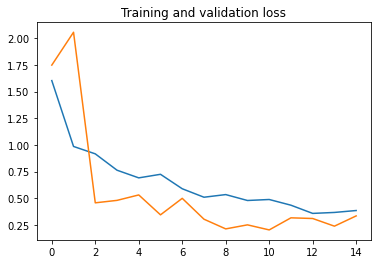

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

# Get number of epochs
epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
#first experimented for predicting for one 
'''def predict():
   path='/content/gdrive/My Drive/CV/test_set/' 
   test_files=os.listdir(path)

#for fl in test_files:
   img=image.load_img(str(path+test_files[0]), target_size=(300,300))
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)

   images=np.vstack([x])
   classes=model.predict(images, batch_size=10)
   print(classes)'''


In [ ]:
#final function
from keras.preprocessing import image
import os
import csv

def predict(file_name):
  path='/content/gdrive/My Drive/CV/train_set/drawings/'

  output_list=['drawings','','','','']

  img=image.load_img(str(path+file_name), target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images=np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes)

  max_ind=np.argmax(classes)
  pred_category=categories[max_ind]

  return pred_category

In [ ]:
print(predict('i - 255.jpeg'))

[[1. 0. 0. 0. 0.]]
drawings


In [ ]:
def make_csv():
  file_path='/content/gdrive/My Drive/CV/'
  #my file name
  filename='submission_S.csv' 
  
  num_rows=len(os.listdir('/content/gdrive/My Drive/CV/test_set/'))
  row_list=[]
  header_row=[]

  with open(str(file_path+filename), "r") as csvfile:
    read_file=csv.reader(csvfile)

    header_row=next(read_file)
    print(header_row)

    for row in range(num_rows-1):
      row_list.append(row)

    with open(str(file_path+filename), "w") as csvfile:
      write_file=csv.writer(csvfile)

      write_file.writerow(header_row)

      for i in range(num_rows-1):
        row = [row_list[i], predict(row_list[i][0])]
        write_file.writerow(row)



In [ ]:
model.save('/content/gdrive/My Drive/model_s.h5')
#for saving the fuction and model, earlier used this

In [ ]:
my_saved_model = tf.keras.models.load_model('/content/gdrive/My Drive/model_s.h5')

In [ ]:
make_csv()

798
['id', 'label']
[[0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]]
[[0. 0. 1. 0. 0.]]
[[0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]]
[[1.0000000e+00 0.0000000e+00 1.3873234e-32 0.0000000e+00 0.0000000e+00]]
[[0. 0. 1. 0. 0.]]
[[0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1.]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[4.7120584e-23 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]]
[[1.0000000e+00 0.0000000e+00 2.8129674e-09 0.0000000e+00 0.0000000e+00]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]]
[[6.6270873e-25 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]]
[[0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]]
